{'pool_id': '1', 'base_rate': 0.05, 'base_slope': 0.075, 'kink_slope': 0.356, 'optimal_util_rate': 0.9, 'borrow_amount': 0.65, 'reserve_size': 1.0}


<Axes: xlabel='x_0'>

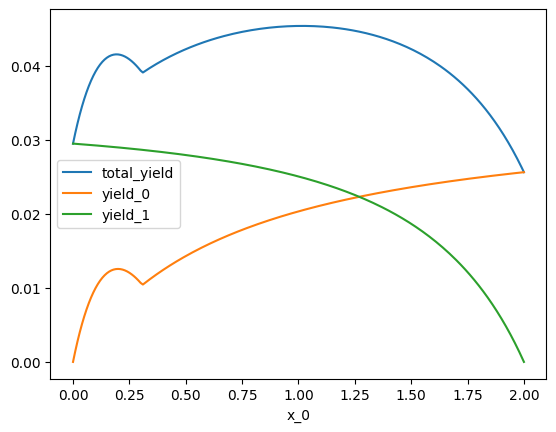

In [9]:
# plotting the curve of allocation to understand the apy characteristics
# yield = alloc * borrow_amount / (1 + alloc) * borrow_rate(borrow_amount/(1+alloc))


import pandas as pd
import numpy as np
from sturdy.pools import generate_assets_and_pools
from sturdy.utils.misc import supply_rate

# {'total_assets': 2.0, 'pools': {'0': {'pool_id': '0', 'base_rate': 0.04, 'base_slope': 0.012, 'kink_slope': 0.22, 'optimal_util_rate': 0.65, 'borrow_amount': 0.85, 'reserve_size': 1.0}, '1': {'pool_id': '1', 'base_rate': 0.05, 'base_slope': 0.075, 'kink_slope': 0.356, 'optimal_util_rate': 0.9, 'borrow_amount': 0.65, 'reserve_size': 1.0}}}
# global: {'0': 1.01647553, '1': 0.98352446}
# global: 0.04538979096671239
# global: calc_strategy_apy 6.970036962160095
# global: get_agg_apy 6.900362946678085
# yiop: {'0': 1.0416744, '1': 0.95832559}
# yiop:  0.045382514761274556
# yiop: calc_strategy_apy 8.5439043175689
# yiop: get_agg_apy 8.610952808355512

pools = {'0': {'pool_id': '0', 'base_rate': 0.04, 'base_slope': 0.012, 'kink_slope': 0.22, 'optimal_util_rate': 0.65, 'borrow_amount': 0.85, 'reserve_size': 1.0}, '1': {'pool_id': '1', 'base_rate': 0.05, 'base_slope': 0.075, 'kink_slope': 0.356, 'optimal_util_rate': 0.9, 'borrow_amount': 0.65, 'reserve_size': 1.0}}
# pools ={'0': {'pool_id': '0', 'base_rate': 0.02, 'base_slope': 0.01, 'kink_slope': 0.3, 'optimal_util_rate': 0.5, 'borrow_amount': 0.65, 'reserve_size': 1.0}, '1': {'pool_id': '1', 'base_rate': 0.01, 'base_slope': 0.037, 'kink_slope': 0.956, 'optimal_util_rate': 0.75, 'borrow_amount': 0.55, 'reserve_size': 1.0}}
# init_assets_and_pools = generate_assets_and_pools()

# x = np.arange(0, 1.1, 0.01)
# df = pd.DataFrame({'x': x})
# labels = [str(i) for i in range(len(pools))]
# for label in labels:
#     df[label] = [supply_rate(x, pools[label]) for x in df['x']]
# df[['x', '0', '1']].plot(0)
# df.plot(0)
print(pools['1'])
x = np.arange(0, 2.01, 0.01)
y = 2 - x
df = pd.DataFrame({'x_0': x, 'x_1': y})

labels = [str(i) for i in range(len(pools))]
for label in labels:
    yields = []
    reserve_sizes = []
    util_rates = []
    for allocation in df[f'x_{label}']:
        reserve_size = pools[label]['reserve_size'] + allocation
        util_rate = pools[label]['borrow_amount'] / reserve_size
        pool_yield = allocation * supply_rate(util_rate, pools[label])
        yields.append(pool_yield)
        reserve_sizes.append(reserve_size)
        util_rates.append(util_rate)
    df[f'yield_{label}'] = yields
    df[f'reserve_{label}'] = reserve_sizes
    df[f'util_rate_{label}'] = util_rates

df['total_yield'] = df['yield_0'] + df['yield_1']
df['total_reserve'] = df['reserve_0'] + df['reserve_1']
df[['x_0', 'total_yield', 'yield_0', 'yield_1']].plot(0)
# df[df['x_0'] > 0.6]


In [202]:
from sturdy.protocol import AllocateAssets
from sturdy.utils.gloyiop import generate_bounds, global_yiop_allocation_algorithm
from sturdy.utils.yiop import yiop_allocation_algorithm


def calc_apy(pools, allocations):
    curr_yield = 0
    for uid, pool_data in pools.items():
        # print(f'uid: {uid}, pool_data: {pool_data}')
        util_rate = pool_data["borrow_amount"] / (pool_data["reserve_size"] + allocations[uid])
        # util_rate = allocations[uid] / (pool_data['reserve_size'] + allocations[uid])
        pool_yield = allocations[uid] * supply_rate(
            util_rate, pools[uid]
        )
        # print(f'uid {uid}, reserve: {pool_data["reserve_size"]} allocation: {allocations[uid]} util_rate: {util_rate} yield {pool_yield}')
        curr_yield += pool_yield
    return curr_yield


assets_and_pools = {
    'total_assets': 2.0,
    'pools': pools
}
allocation = global_yiop_allocation_algorithm(AllocateAssets(assets_and_pools=assets_and_pools))
print('global alloc', allocation)
print('global:', calc_apy(assets_and_pools['pools'], allocation))
allocation  = yiop_allocation_algorithm(AllocateAssets(assets_and_pools=assets_and_pools))
print('yiop alloc', allocation)
print('yiop: ', calc_apy(assets_and_pools['pools'], allocation))

generate_bounds(assets_and_pools['pools'], assets_and_pools['total_assets'])

global alloc {'0': 1.23745708, '1': 0.76254291}
global: 0.015321164307749883
Optimization terminated successfully    (Exit mode 0)
            Current function value: -0.015320985785258262
            Iterations: 7
            Function evaluations: 21
            Gradient evaluations: 7
yiop alloc {'0': 1.24386595, '1': 0.75613404}
yiop:  0.0153209857610822


[[(0, 0.30000000000000004), (0, 2.0)], [(0.30000000000000004, 2.0), (0, 2.0)]]

In [41]:
# allocations = {'0': 0.93, '1': 0.07}
allocations = {'0': 0.0, '1': 1}
uid = '0'
util_rate = allocations[uid] / pools[uid]['reserve_size']
pool_yield = allocations[uid] * supply_rate(
    util_rate, pools[uid]
)
pool_yield

0.0

{'pool_id': '0', 'base_rate': 0.04, 'base_slope': 0.087, 'kink_slope': 0.922, 'optimal_util_rate': 0.75, 'borrow_amount': 0.7, 'reserve_size': 1.0}


<Axes: xlabel='x'>

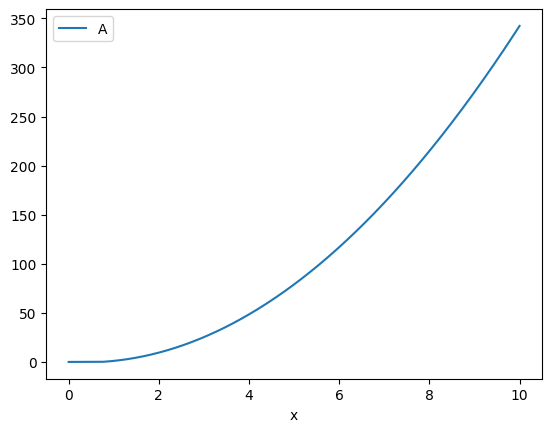

In [8]:
import numpy as np
import pandas as pd
from sturdy.utils.misc import supply_rate
from sturdy.pools import generate_assets_and_pools
assets_and_pools = generate_assets_and_pools()
pools = assets_and_pools['pools']
print(pools['0'])
x = np.arange(0, 10, 0.001)
df = pd.DataFrame({'x': x})
df['A'] = [supply_rate(x, pools['0']) for x in df['x']]
df.plot(x='x', y='A')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<Axes: xlabel='borrow_amount'>

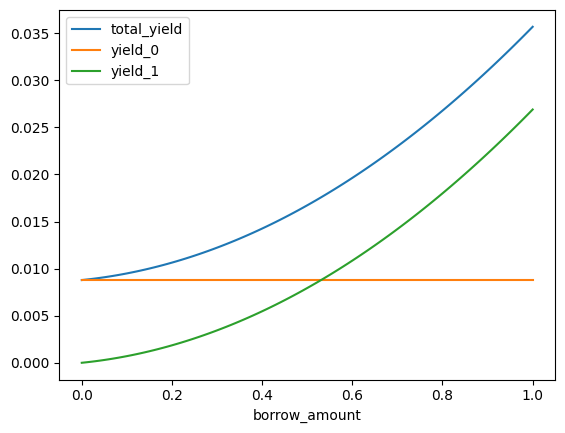

In [54]:
# plotting the yield when borrow_amount change
# => usually the yield is increasing with the borrow_amount change
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
from sturdy.pools import generate_assets_and_pools
from sturdy.utils.yiop import yiop_allocation_algorithm
from sturdy.protocol import AllocateAssets
from sturdy.utils.misc import supply_rate

assets_and_pools = generate_assets_and_pools(num_pools=2)
pools = assets_and_pools['pools']
allocation  = yiop_allocation_algorithm(AllocateAssets(assets_and_pools=assets_and_pools))

pool_id = '1'
borrow_amount = np.arange(0, pools[pool_id]['reserve_size'] + 0.01, 0.01)
df = pd.DataFrame({'borrow_amount': borrow_amount})
pool_ids = [str(i) for i in range(len(pools))]
for pid in pool_ids:
    yields = []
    reserve_sizes = []
    util_rates = []
    for borrow_amount in df['borrow_amount']:
        if pid != pool_id:
            borrow_amount = pools[pid]['borrow_amount']
        reserve_size = pools[pid]['reserve_size'] + allocation[pid]
        util_rate = borrow_amount / reserve_size
        pool_yield = allocation[pid] * supply_rate(util_rate, pools[pid])
        yields.append(pool_yield)
        reserve_sizes.append(reserve_size)
        util_rates.append(util_rate)
    df[f'yield_{pid}'] = yields
    df[f'reserve_{pid}'] = reserve_sizes
    df[f'util_rate_{pid}'] = util_rates

df['total_yield'] = df['yield_0'] + df['yield_1']
df['total_reserve'] = df['reserve_0'] + df['reserve_1']
df[['borrow_amount', 'total_yield', 'yield_0', 'yield_1']].plot(0)